In [2]:
import sys
import requests
import json
import matplotlib.pyplot as plt
sessions = { "102": 1991, "103": 1993, "104": 1995, "105": 1997, "106": 1999,       
            "107": 2001, "108": 2003, "109": 2005, "110": 2007, "111": 2009, 
            "112": 2011, "113": 2013, "114": 2015, "115": 2017, "116": 2019             }
def get(url):
    headers = {"X-API-KEY":"r6ztzxBEjCPphsYoIkCfR3YDGPrPNzv8PGGwhfi7"}
    url = "https://api.propublica.org/congress/v1"+ url 
    data = requests.get(url, headers=headers).json()
    return data['results']

class Member():
    def __init__(self,first_name,last_name,date_of_birth,gender,party):
        self.first_name=first_name
        self.last_name=last_name
        self.date_of_birth=date_of_birth
        self.gender=gender
        self.party=party
    def calculate_age(self,year):
        YDM=self.date_of_birth.split("-")
        birthyear=int(YDM[0])
        return(year-birthyear)
    
def member_ages(session_range):
    nums=session_range.split("-")
    first=int(nums[0])
    last=int(nums[1])
    avg_dem=[]
    avg_republican=[]
    avg_house=[]
    avg_senate=[]
    avg_male=[]        
    avg_female=[]
    SessionNumbers=range(first,last+1)
    for sesh in range(first,last+1):
        dem=[]
        republican=[]
        house=[]
        senate=[]
        male=[]
        female=[]
        for chamber in("house","senate"):
            response=get(f"/{sesh}/{chamber}/members.json")
            for i in response[0]["members"]:
                member=Member(i["first_name"],i["last_name"],i["date_of_birth"],i["gender"],i["party"])
                kay=str(sesh)
                year=sessions[kay]
                member_age=member.calculate_age(year)
                
                if(member.party=="D"):
                    dem.append(member_age)
                if (member.party=="R"):
                    republican.append(member_age)
                    #republican.append(sum(republican)/len(republican))
                if(chamber=="house"):
                    house.append(member_age)
                    #house.append(sum(house)/len(house))
                if(chamber=="senate"):
                    senate.append(member_age)
                   # senate.append(sum(senate)/len(senate))
                if(member.gender=="M"):
                    male.append(member_age)
                   # male.append(sum(male)/len(male))
                if(member.gender=="F"):
                    female.append(member_age)
                   # female.append(sum(female)/len(female))
        avg_dem.append(sum(dem)/len(dem))
        avg_republican.append(sum(republican)/len(republican))
        avg_house.append(sum(house)/len(house))
        avg_senate.append(sum(senate)/len(senate))
        avg_male.append(sum(male)/len(male))
        avg_female.append(sum(female)/len(female))
    SessionNumbers=range(first,last+1)
    plt.plot(SessionNumbers,avg_dem, label ="Democrat")
    plt.plot(SessionNumbers,avg_republican, label="Republican")
    plt.plot(SessionNumbers,avg_male, label="Male")
    plt.plot(SessionNumbers,avg_female, label="Female")
    plt.plot(SessionNumbers,avg_house,label="House")
    plt.plot(SessionNumbers,avg_senate,label="Senate")
    plt.ylabel("Age")
    plt.xlabel("Session of Congress")
    plt.title("Age of Congress people")   
    plt.legend()

    
    

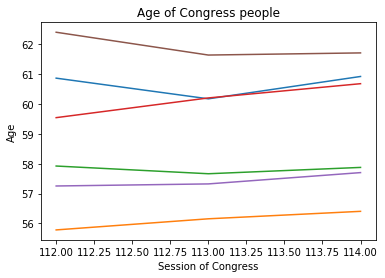

In [3]:
member_ages("112-114")

NameError: name 'url' is not defined